In [1]:
# Import modules
import numpy as np
import tensorflow as tf

import sys
import os.path
from time import time
from time import gmtime, strftime
import pickle
import matplotlib.pyplot as plt
%matplotlib inline

from config import *
cwd = os.getcwd()

# Reset tf graph
tf.reset_default_graph()

# Start an interactive session
sess = tf.InteractiveSession()

In [2]:
# change to data directory
local_repo = home_dir + "18level" + '/'

os.chdir(local_repo)

# Load Training/Testing Data
x = np.load('trData.npy')[:, :-1]
x_t = np.load('teData.npy')[:, :-1]
y = np.load('trData.npy')[:, -1].reshape((len(x), 1))
y_t = np.load('teData.npy')[:, -1].reshape((len(x_t), 1))
scale_params = pickle.load(open('scaleParams.p', 'rb'))

n_features = len(x.T)
n_targets = len(y.T)

In [3]:
# Create placeholders for the input 
# and the target
with tf.name_scope('input'):
    x_ = tf.placeholder(tf.float32, shape=[None, n_features])
    y_ = tf.placeholder(tf.float32, shape=[None, n_targets])

In [4]:
# Create network helper functions

def create_weights(input_dim, n_units, name):
    """A helper function for creating weights."""
    with tf.name_scope("Weights_Layer_" + str(name)):
        return tf.Variable(tf.random_normal(shape=[input_dim, n_units], 
                                            stddev=1.0/float(input_dim)))
    
def create_biases(n_biases, name):
    """A helper function for creating biases."""
    with tf.name_scope("Biases_Layer_" + str(name)):
        return tf.Variable(tf.zeros(shape=[n_biases]))
    
def ff_layer(signal, n_units, num, act='relu'):
    """Send a signal through a layer of neuron
    units and returns the activations and weights if needed.
    
    """
    with tf.name_scope("Layer_" + str(num)):
        # Get size information
        input_dim = signal.get_shape().as_list()[1]
        # Create weights and biases
        W = create_weights(input_dim, n_units, num)
        b = create_biases(n_units, num)
    
        # Return activations
        if act == 'relu':
            return tf.nn.relu(tf.matmul(signal, W) + b)
        else:
            return tf.matmul(signal, W) + b

In [5]:
# Use the previous functions to create a model
fc1 = ff_layer(x_, 5, 1)
fc2 = ff_layer(fc1, 3, 2)
z = ff_layer(fc2, 1, 3)

# Define the loss function
with tf.name_scope("Loss"):
    loss = tf.reduce_sum(tf.nn.l2_loss(z - y_))
    
# Initialize all tf variables
sess.run(tf.global_variables_initializer())

In [6]:
# Train the model using gradient descent with a step size of 0.5
train_step = tf.train.GradientDescentOptimizer(1e-2).minimize(loss)

# Run training step multiple times to reduce loss
for i in range(len(x)):
    train_step.run(feed_dict={x_: x[i, :].reshape((1, 8)), y_: y[i, :].reshape((1, 1))})

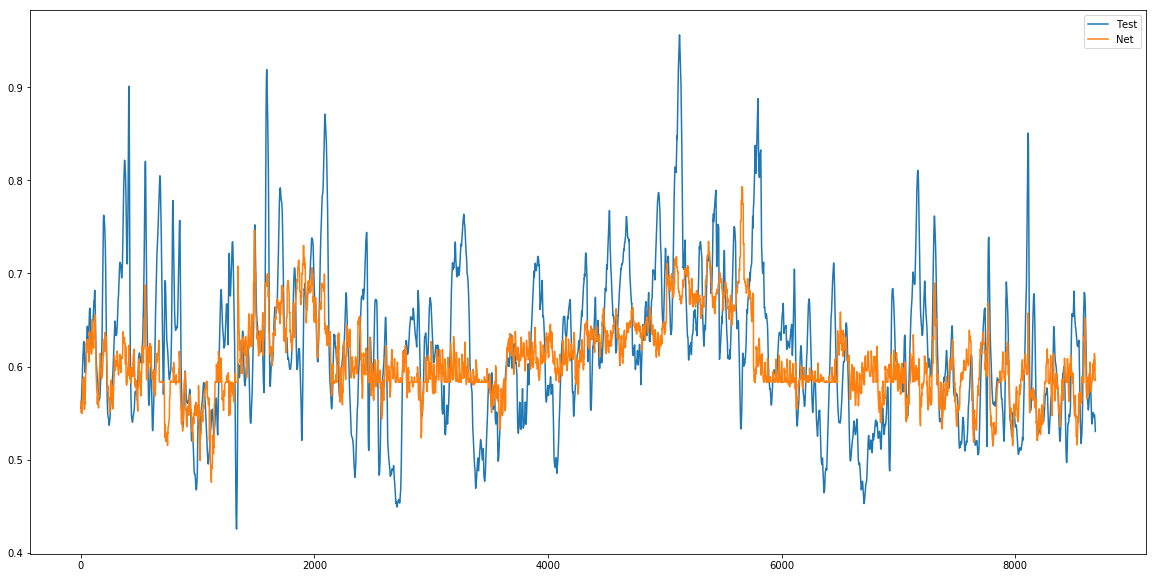

In [11]:
z1 = z.eval(feed_dict={x_: x_t})
plt.figure(figsize=(20, 10))
plt.plot(y_t, label='Test')
plt.plot(z1, label='Net')
plt.legend()
plt.savefig('fit1.png')

In [12]:
mse = tf.nn.l2_loss(z1 - y_t)

In [13]:
print mse.eval()

22.5692780094
